In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import pandas as pd

In [16]:
##Simulate a decision-making optimization strategy with three arms: 30%, 60%, and 90%.

#clear
ab = ([5,10], [5,10], [5,10]) #prior assumption: 1/3 for each
p = [0.3, 0.6, 0.9] #true probability of the arms
w_1=0.3 #initial accuracy of execution for the optimal learning rule
w_2=1
w_3=0.4
N = 3 #number of arms

In [17]:
# for testing 
# ab[0][0]
# arm1=1
# prob = []
# ab[arm1][0]/((ab[arm1][0] + ab[arm1][1]))

# for i in range(3):
# # prob[0]=ab[arm1][0]/((ab[arm1][0] + ab[arm1][1]))
#     prob=np.append(prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))
# prob

In [18]:
def det_range_w1(rand,decision_list):
    # determine which range that rand falls into
    counter=0
    if rand >=decision_list[0] and rand <decision_list[1]:
        counter=0
    elif rand >=decision_list[1] and rand <decision_list[2]:
        counter=1
    elif rand >=decision_list[2] and rand <=decision_list[3]:
        counter=2
    return counter

# when w=0.3 

In [19]:
data = np.zeros((4, 100))#create empty matrix

for trial in range(100):
    post_prob = []
    P_D = np.zeros((1,3))
    for arm1 in range(3):
        post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))

        
    # calcualte the suboptimal decision rule
    Nmax = sum((post_prob == max(post_prob)))
    # In case all arms have the same probability
    if Nmax == N:
        P_D = post_prob
    else:
        for arm in range(3):
            if post_prob[arm] == max(post_prob):
                P_D[arm] = w_1/Nmax
            else:
                P_D[arm] = (1 - w_1)/(N-Nmax)        
#     print("P_D value: ",P_D)   


    # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
    # each ice hole, based on the suboptimal decision rule
    # decisions return in the variable: result
    decision_range = np.cumsum([P_D]) # need edit for decision
    decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
    rand=round(random.uniform(0, 1),1)
    result=det_range_w1(rand,decision_list)
#     print(result)
  
    # reward outcome
    reward=np.random.multinomial(1,[p[result],1-p[result]])
#     print(reward)
    
    new_1=ab[result][0]+reward[0]
    new_2=ab[result][1]+reward[1]
    
  
    # store in data
    data[0][trial] = trial
    data[1][trial] = result * 30
    data[2][trial] = reward[0]
    data[3][trial] = sum(data[2,1:trial]) # didn't change, not sure what that is
    
#     w = w + (0.4/100)
print(data)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
  90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
 [ 0.  0. 60.  0. 60. 60.  0. 30. 30.  0. 30. 60. 30.  0. 30.  0. 60. 60.
  30.  0. 60. 60.  0.  0.  0. 30.  0. 60.  0. 60.  0. 60.  0.  0.  0. 60.
  60.  0. 60. 30. 30.  0. 60. 30. 60.  0. 30. 60. 30. 30. 60. 30. 60.  0.
   0.  0. 30. 60. 30. 30.  0.  0. 30. 60.  0.  0. 30. 60.  0. 60.  0. 30.
  30.  0.  0.  0. 30.  0.  0.  0. 60. 60. 30.  0.  0.  0. 60. 60.  0.  0.
  60. 60. 60. 60. 30. 60. 30. 60.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  0.  1.  0.  0.  1.  1.  0.  0.  0.  1.  1.  1.
   1.  0.  1.  0.  0.  0.  1.  1.  1.  1.  0.  1.  1.  1.  0.  0.  0.  1.
   0.  0.  1.  1.  1.  0. 

# when w=1

In [20]:
data2 = np.zeros((4, 100))#create empty matrix

for trial2 in range(100):
    post_prob = []
    P_D = np.zeros((1,3))
    for arm1 in range(3):
        post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))

        
    # calcualte the suboptimal decision rule
    Nmax = sum((post_prob == max(post_prob)))
    # In case all arms have the same probability
    if Nmax == N:
        P_D = post_prob
    else:
        for arm in range(3):
            if post_prob[arm] == max(post_prob):
                P_D[arm] = w_2/Nmax
            else:
                P_D[arm] = (1 - w_2)/(N-Nmax)        
#     print("P_D value: ",P_D)   


    # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
    # each ice hole, based on the suboptimal decision rule
    # decisions return in the variable: result
    decision_range = np.cumsum([P_D]) # need edit for decision
    decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
#     print(decision_list)
    rand=round(random.uniform(0, 1),1)#randomnize a float betw 0-1
    result=det_range_w1(rand,decision_list)
#     print(result)
  
    # reward outcome
    reward=np.random.multinomial(1,[p[result],1-p[result]])
#     print(reward)
    
    new_1=ab[result][0]+reward[0]
    new_2=ab[result][1]+reward[1]
    
    data2[0][trial2] = trial2
    data2[1][trial2] = result * 30
    data2[2][trial2] = reward[0]
    data2[3][trial2] = sum(data2[2,1:trial2]) # didn't change, not sure what that is

print(data2)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
  90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
 [30. 60.  0.  0. 60. 30. 60.  0. 30.  0. 60. 60.  0.  0. 30. 60. 30. 60.
  60. 60.  0.  0. 30. 60.  0. 30.  0. 60. 60.  0. 60.  0.  0. 30.  0.  0.
  60.  0. 60. 30. 30. 30. 60. 60.  0. 30. 60.  0. 30. 60. 30.  0. 30.  0.
  30.  0. 60. 60.  0.  0. 30. 60. 30. 30. 30.  0. 30.  0. 60.  0. 30. 30.
  60. 60. 60. 60. 60.  0. 30. 60. 60. 60.  0. 60.  0.  0. 30.  0.  0. 60.
  30. 60.  0. 30. 30. 60.  0.  0.  0.  0.]
 [ 1.  0.  1.  1.  1.  1.  1.  1.  0.  0.  1.  1.  0.  0.  0.  1.  0.  1.
   1.  1.  0.  0.  0.  1.  0.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.  0.
   1.  0.  1.  1.  1.  1. 

# when w=0.4

In [21]:
data3 = np.zeros((4, 100))#create empty matrix

for trial3 in range(100):
    post_prob = []
    P_D = np.zeros((1,3))
    for arm1 in range(3):
        post_prob=np.append(post_prob,ab[arm1][0]/((ab[arm1][0] + ab[arm1][1])))

        
    # calcualte the suboptimal decision rule
    Nmax = sum((post_prob == max(post_prob)))
    # In case all arms have the same probability
    if Nmax == N:
        P_D = post_prob
    else:
        for arm in range(3):
            if post_prob[arm] == max(post_prob):
                P_D[arm] = w_3/Nmax
            else:
                P_D[arm] = (1 - w_3)/(N-Nmax)        
#     print("P_D value: ",P_D)   


    # A decision-result(either 0,1, or 2) is made based on the prob of choosing 
    # each ice hole, based on the suboptimal decision rule
    # decisions return in the variable: result
    decision_range = np.cumsum([P_D]) # need edit for decision
    decision_list=np.append([0],decision_range) #[0.         0.33333333 0.66666667 1.        ]
#     print(decision_list)
    rand=round(random.uniform(0, 1),1)#randomnize a float betw 0-1
    result=det_range_w1(rand,decision_list)
#     print(result)
  
    # reward outcome
    reward=np.random.multinomial(1,[p[result],1-p[result]])
#     print(reward)
    
    new_1=ab[result][0]+reward[0]
    new_2=ab[result][1]+reward[1]
    
    data3[0][trial3] = trial3
    data3[1][trial3] = result * 30
    data3[2][trial3] = reward[0]
    data3[3][trial3] = sum(data3[2,1:trial3]) # didn't change, not sure what that is
print(data3)

[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
  90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
 [60.  0.  0. 60.  0. 60. 60. 30. 60. 30.  0. 30. 30.  0.  0. 30.  0. 30.
  30.  0. 60.  0.  0. 30. 30. 60.  0. 60. 60. 30.  0.  0. 30.  0. 60. 30.
   0.  0. 60. 30.  0. 30. 60.  0. 30. 60. 60. 60. 30.  0. 60. 60. 60.  0.
  60. 30.  0. 60. 60. 30. 30. 60.  0. 60. 60.  0.  0.  0.  0. 60. 30.  0.
  60. 30. 60. 30. 30.  0. 60. 30.  0. 30.  0. 30.  0. 30. 60. 60.  0. 30.
   0. 60. 60. 60.  0.  0. 30. 60. 30. 30.]
 [ 1.  0.  0.  1.  1.  0.  1.  1.  0.  1.  1.  0.  1.  1.  1.  1.  0.  1.
   1.  0.  1.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  0.  0.  0.  1.  0.
   1.  0.  1.  0.  0.  0. 

In [22]:
#read files as df
file_lst=["s01.csv","s02.csv","s03.csv"]
df_lst=[] #create a list of dfs
for file in file_lst:
    df=pd.read_csv(str(file),sep='\t',header=None)
    
    if (file=='s02') or (file=='s03'):
        df=df.iloc[[0,2,3,4],:]
        df_lst.append(df)
    else:
        df_lst.append(df)

# Plotting

In [9]:
# get x_values, y_values from one df,or data/data2/data3
def y_values(df):
    x=df[0:1]
    #x_val=[val for sublist in x for val in sublist]
    print(x)
    if df.shape==(5,100):
        y=df[4:5]
    else:
        y=df[3:4]
    #y_val=[val for sublist in y for val in sublist]
    return y # x_val can be generated later since all are same

In [10]:
# make a list of list (with y values)
def get_y_values(df_lst):
    y_label_lst=[]
    for df in df_lst:
        y_current=y_values(df)
        y_label_lst.append(y_current)
    return y_label_lst

In [11]:
def convert_to_df(data):
    df = pd.DataFrame(data)
    return df

In [12]:
def plot_graph(orig_y_list,weight_y_list,label_w):
    fig, ax = plt.subplots()
    x=np.arange(1,101,1)
    label=0
    counter=0
    for y in orig_y_list:
        ax.plot(x, y,label='subject '+ str(label))
        label+=1
    for y in weight_y_list:
        ax.plot(x, y,label='eG,w='+ label_w[counter])
        counter+=1
    plt.xlabel('Trial')
    plt.ylabel('reward score')
    leg = ax.legend()
    fig.show()

                                                   0
0  2,2.2,2.4,2.6,2.8,2.10,2.12,2.14,2.16,2.18,2.2...
                                                   0
0  1,1.2,1.4,1.6,1.8,1.10,1.12,1.14,1.16,1.18,1.2...
                                                   0
0  2,2.2,2.4,2.6,2.8,2.10,2.12,2.14,2.16,2.18,2.2...
[                                                   0
3  1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0....,                                                    0
3  0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1....,                                                    0
3  1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1....]
[[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
  18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
  36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
  54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
  72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87

TypeError: unhashable type: 'numpy.ndarray'

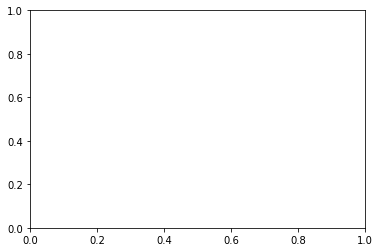

In [13]:
label_w=['0.3-0.7','1','0.5']

plot_list=[df_lst[0],df_lst[1],df_lst[2]]

data_list=[data,data2,data3]
#print(data3)

data=convert_to_df(data)

orig_y_list = get_y_values(plot_list) # y values from the original df
#orig_y_list = orig_y_list.tolist()
print(orig_y_list)

weight_y_list = get_y_values(data_list) # y values from the weighted df
print(weight_y_list)


plot_graph(orig_y_list,weight_y_list,label_w)

In [14]:
print(data[3])
print(data2[3])
print(data3[3])


0    3.0
1    0.0
2    0.0
3    2.0
Name: 3, dtype: float64
[ 0.  0.  0.  0.  1.  2.  3.  3.  4.  5.  6.  6.  7.  7.  8.  9. 10. 10.
 10. 10. 11. 11. 12. 13. 13. 13. 13. 14. 14. 15. 16. 17. 17. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 27. 27. 28. 29. 29. 29. 30. 31. 31. 32.
 32. 33. 33. 34. 35. 35. 36. 36. 36. 37. 38. 39. 40. 41. 41. 41. 42. 42.
 43. 43. 44. 44. 44. 45. 46. 46. 47. 47. 47. 47. 48. 49. 49. 50. 51. 52.
 53. 54. 55. 56. 57. 57. 58. 58. 59. 59.]
[ 0.  0.  1.  2.  3.  3.  3.  3.  3.  3.  3.  4.  5.  6.  7.  8.  9.  9.
  9. 10. 10. 11. 12. 12. 13. 14. 14. 15. 15. 16. 17. 18. 19. 19. 20. 20.
 20. 20. 20. 21. 21. 22. 23. 24. 24. 24. 25. 26. 27. 28. 29. 30. 31. 31.
 31. 32. 32. 33. 34. 34. 35. 36. 37. 37. 37. 37. 38. 38. 39. 40. 41. 42.
 42. 43. 43. 43. 43. 43. 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 44. 45.
 46. 47. 48. 49. 50. 51. 52. 53. 53. 54.]


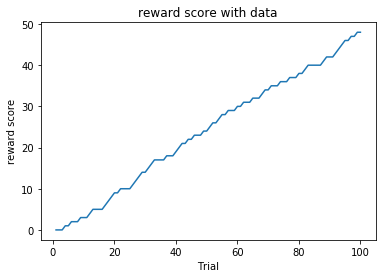

In [23]:
data[3]
data_lst = data[3].tolist()
x = list(range(1, 101))
plt.title('reward score with data')
plt.xlabel('Trial')
plt.ylabel('reward score')
plt.plot(x,data_lst)


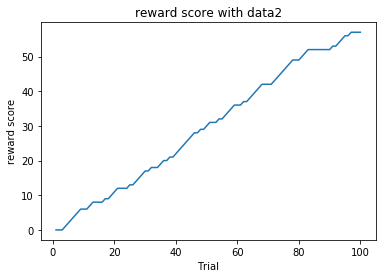

In [24]:
data2[3]
data_2st = data2[3].tolist()
x = list(range(1, 101))
plt.title('reward score with data2')
plt.xlabel('Trial')
plt.ylabel('reward score')
plt.plot(x,data_2st)

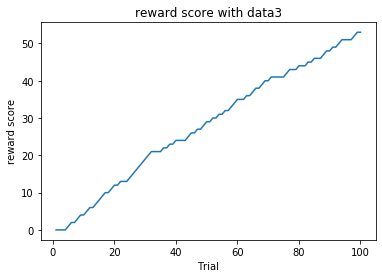

In [25]:
data3[3]
data_3st = data3[3].tolist()
x = list(range(1, 101))
plt.title('reward score with data3')
plt.xlabel('Trial')
plt.ylabel('reward score')
plt.plot(x,data_3st)

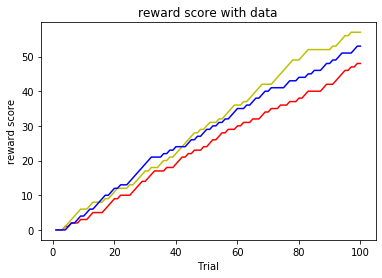

In [26]:
plt.title('reward score with data')
plt.xlabel('Trial')
plt.ylabel('reward score')
plt.plot(x,data_lst, color = 'r' )
plt.plot(x,data_2st, color = 'y')
plt.plot(x,data_3st, color = 'b')

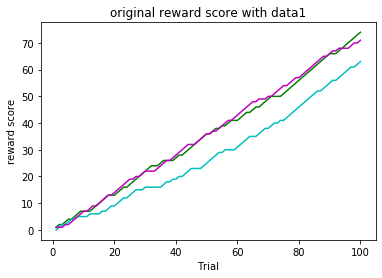

In [27]:
df_1=pd.read_csv('s01.csv')
df_2=pd.read_csv('s02.csv')
df_3=pd.read_csv('s03.csv')
data_origin_1 = df_1.iloc[3].tolist()
data_origin_2 = df_2.iloc[3].tolist()
data_origin_3 = df_3.iloc[3].tolist()
x = list(range(1, 101))
plt.title('original reward score with data1')
plt.xlabel('Trial')
plt.ylabel('reward score')
plt.plot(x,data_origin_1,color = 'g')
plt.plot(x,data_origin_2,color = 'c')
plt.plot(x,data_origin_3,color = 'm')

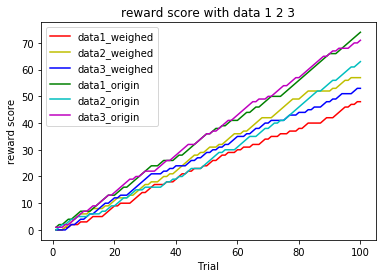

In [28]:
x = list(range(1, 101))
plt.title('reward score with data 1 2 3')
plt.xlabel('Trial')
plt.ylabel('reward score')
plt.plot(x,data_lst, color = 'r' ,label = 'data1_weighed')
plt.plot(x,data_2st, color = 'y',label = 'data2_weighed')
plt.plot(x,data_3st, color = 'b',label = 'data3_weighed')
plt.plot(x,data_origin_1,color = 'g', label = 'data1_origin')
plt.plot(x,data_origin_2,color = 'c', label = 'data2_origin')
plt.plot(x,data_origin_3,color = 'm', label = 'data3_origin')
plt.legend()


In [ ]:
def plot(y):
    x = list(range(1, 101))
    y = data[3].tolist() #change dataset
    plt.title('reward score with data')
    plt.xlabel('Trial')
    plt.ylabel('reward score')
    plt.plot(x,y, color = 'r' ,label = 'data_weighed')
    plt.legend()